## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,auc

## LOADING THE DATA

In [2]:
raw_data = pd.read_csv('worldhappiness.csv')

In [3]:
raw_data.head()

,Unnamed: 0,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [4]:
df = raw_data.copy()

In [5]:
df

,Unnamed: 0,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...,...,...
926,144,2021,Lesotho,145,3.512,0.45100,0.73100,0.00700,0.40500,0.01500,0.10300
927,145,2021,Botswana,146,3.467,1.09900,0.72400,0.34000,0.53900,0.08800,0.02700
928,146,2021,Rwanda,147,3.415,0.36400,0.20200,0.40700,0.62700,0.49300,0.22700
929,147,2021,Zimbabwe,148,3.145,0.45700,0.64900,0.24300,0.35900,0.07500,0.15700


In [6]:
#Display all data
pd.options.display.max_rows = None
display(df)

,Unnamed: 0,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,0,2015,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780
1,1,2015,Iceland,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300
2,2,2015,Denmark,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390
3,3,2015,Norway,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990
4,4,2015,Canada,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110
5,5,2015,Finland,6,7.406,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510
6,6,2015,Netherlands,7,7.378,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100
7,7,2015,Sweden,8,7.364,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620
8,8,2015,New Zealand,9,7.286,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010
9,9,2015,Australia,10,7.284,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620


## Checking Null Values & Data Types

In [7]:
#summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    931 non-null    int64  
 1   Year                          931 non-null    int64  
 2   Country                       931 non-null    object 
 3   Happiness Rank                931 non-null    int64  
 4   Happiness Score               931 non-null    float64
 5   GDP per Capita                931 non-null    float64
 6   Social support                931 non-null    float64
 7   Life Expectancy               931 non-null    float64
 8   Freedom to make life choices  931 non-null    float64
 9   Perceptions of corruption     931 non-null    float64
 10  Generosity                    931 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 80.1+ KB


## Dropping unnecessary Columns for Regression:

In [8]:
df = df.drop(['Unnamed: 0','Happiness Rank','Country','Year'], axis=1)

In [9]:
#Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Happiness Score               931 non-null    float64
 1   GDP per Capita                931 non-null    float64
 2   Social support                931 non-null    float64
 3   Life Expectancy               931 non-null    float64
 4   Freedom to make life choices  931 non-null    float64
 5   Perceptions of corruption     931 non-null    float64
 6   Generosity                    931 non-null    float64
dtypes: float64(7)
memory usage: 51.0 KB


In [10]:
df.head()

,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [11]:
df.describe()

,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
count,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000
mean,5.403636,0.925828,1.032768,0.597651,0.425114,0.127189,0.212089
std,1.119920,0.407326,0.335863,0.245246,0.153905,0.107340,0.119679
min,2.523000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.549000,0.625345,0.813145,0.429392,0.324184,0.055000,0.124125
50%,5.358000,0.986000,1.058180,0.635000,0.443186,0.092000,0.197911
75%,6.195000,1.251070,1.282749,0.790780,0.545000,0.160325,0.268000
max,7.842000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075


## Exploratory Data Analysis

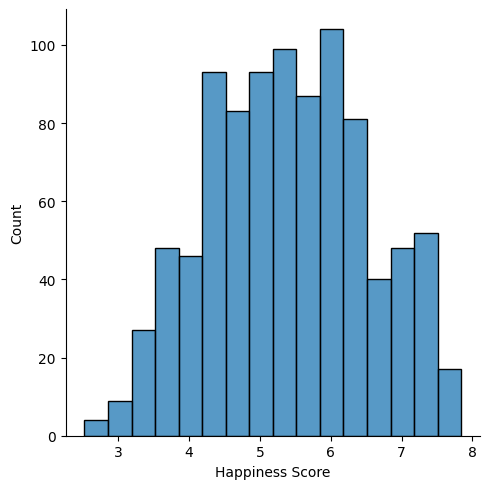

In [12]:
sns.displot(df['Happiness Score'])

The Happiness Score has a normal distribution which is common for social science research.
However, it can be noted that there are peaks  between score 3-4, 5.5-5.5 and between 7-8.
This must be attributed to poor economies, developing economies & developed economies.
The mean of the Distribution of Happiness Score is 5.40

The Happiness Score is not skewed, therefore we do not have Outliers.

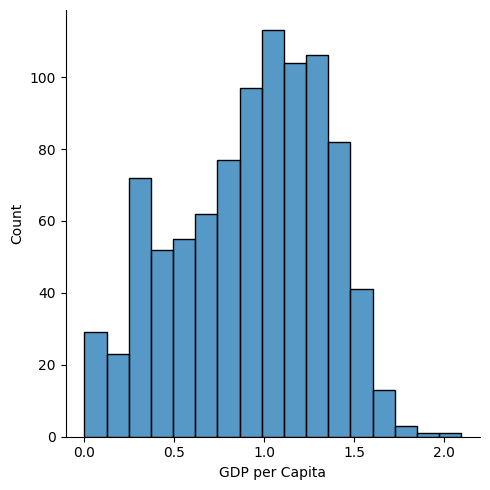

In [13]:
sns.displot(df['GDP per Capita'])

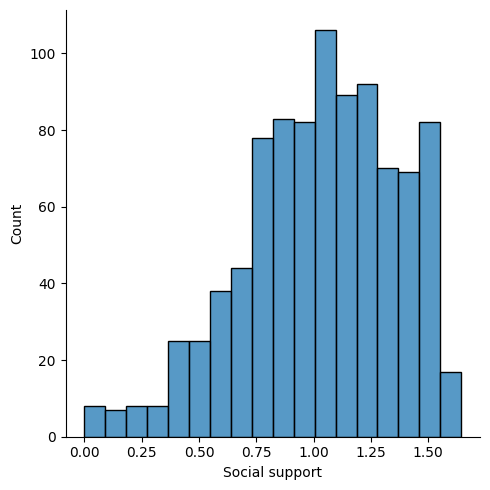

In [14]:
sns.displot(df['Social support'])

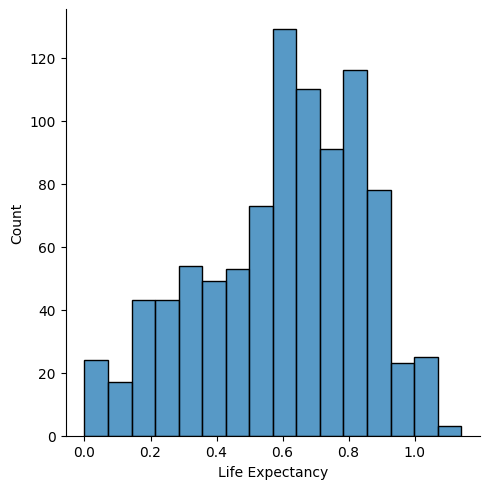

In [15]:
sns.displot(df['Life Expectancy'])

## Multicollinearity

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = df[['GDP per Capita','Social support','Life Expectancy',
       'Freedom to make life choices','Generosity','Perceptions of corruption']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
vif["features"] = features.columns

In [17]:
vif

,VIF,features
0,17.444517,GDP per Capita
1,14.923766,Social support
2,19.399727,Life Expectancy
3,11.028959,Freedom to make life choices
4,4.186114,Generosity
5,3.351603,Perceptions of corruption


## Pearson Correlation coefficient

In [18]:
df.corr()

,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
Happiness Score,1.000000,0.789839,0.611541,0.730403,0.556573,0.403957,0.110412
GDP per Capita,0.789839,1.000000,0.561409,0.777379,0.356818,0.316924,-0.045236
Social support,0.611541,0.561409,1.000000,0.597772,0.332123,0.117403,-0.004269
Life Expectancy,0.730403,0.777379,0.597772,1.000000,0.316124,0.259475,0.008015
Freedom to make life choices,0.556573,0.356818,0.332123,0.316124,1.000000,0.443678,0.241746
Perceptions of corruption,0.403957,0.316924,0.117403,0.259475,0.443678,1.000000,0.287988
Generosity,0.110412,-0.045236,-0.004269,0.008015,0.241746,0.287988,1.000000


# The Linear Regression Model

## Declaring the Dependent & Independent Variables

In [19]:
x = df[['GDP per Capita','Social support','Life Expectancy',
       'Freedom to make life choices','Generosity','Perceptions of corruption']]
y = df['Happiness Score']

In [20]:
x.shape

(931, 6)

In [21]:
y.shape

(931,)

##  Feature Scaling/Standartisation

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [23]:
x_scaled = scaler.transform(x)
x_scaled

array([[ 1.15616278,  0.94357722,  1.40252804,  1.56320725,  0.70802817,
         2.72729614],
       [ 0.92479842,  1.10063052,  1.42867915,  1.32397013,  1.87444081,
         0.13292722],
       [ 0.98168767,  0.97655484,  1.13004247,  1.45795592,  1.0809759 ,
         3.32189533],
       ...,
       [-1.38005137, -2.47486422, -0.77780534,  1.31246335,  0.12465465,
         3.40979423],
       [-1.15161008, -1.14324766, -1.44688206, -0.42980692, -0.46055812,
        -0.48646635],
       [-1.36531322, -3.07662383, -1.92421119, -2.76366896, -0.7531645 ,
        -1.0923442 ]])

In [24]:
x_scaled.shape

(931, 6)

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2, random_state=42)

## Creating the regression

In [26]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [27]:
y_hat = reg.predict(x_train)

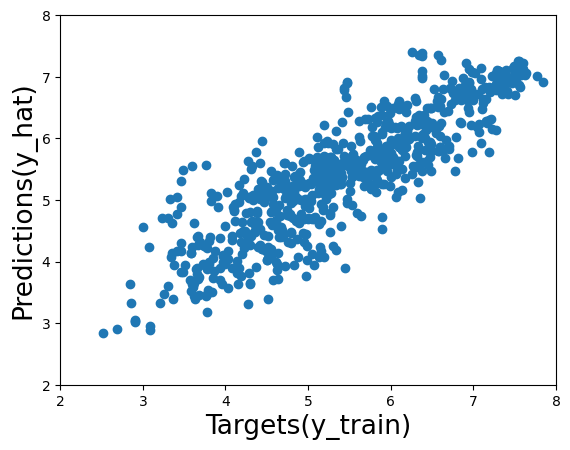

In [28]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets(y_train)',size=19)
plt.ylabel('Predictions(y_hat)',size=19)
plt.xlim(2,8)
plt.ylim(2,8)
plt.show()

All the p_values for all the features are lower than 0.5, therefore all the features are useful

/var/folders/0c/qlldkd194f3crvqnm4tbmws80000gn/T/ipykernel_76715/3564832351.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals Distribution')

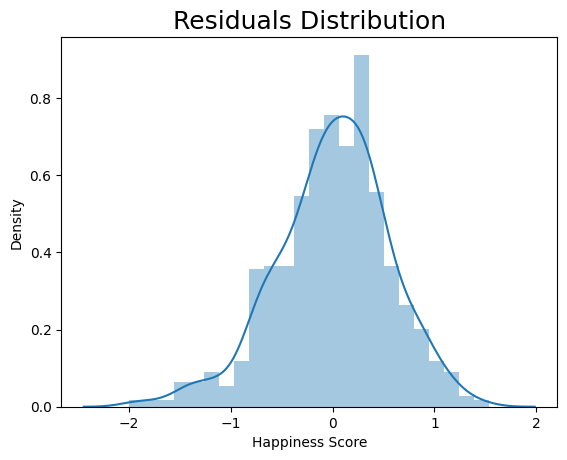

In [29]:
sns.distplot(y_train - y_hat)
plt.title("Residuals Distribution", size=18)

The Residuals are normally Distributed

## P-Value Analysis

In [30]:
from sklearn.feature_selection import f_regression
f_regression(x_train,y_train)

(array([1224.53238267,  443.91089252,  844.06862438,  350.85092958,
           7.22189924,  157.53842128]),
 array([3.35617127e-159, 1.33516497e-077, 1.59752903e-124, 2.11753383e-064,
        7.36327161e-003, 6.61812110e-033]))

In [31]:
p_values = f_regression(x,y)[1]

In [32]:
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values
reg_summary

,Features,Coefficients,p-values
0,GDP per Capita,0.496048,1.894359e-199
1,Social support,0.167474,1.396090e-96
2,Life Expectancy,0.223255,5.502335e-156
3,Freedom to make life choices,0.287137,7.636440e-77
4,Generosity,0.050786,7.389069e-04
5,Perceptions of corruption,0.080809,7.436276e-38


## Calculating the R-squared

In [33]:
reg.score(x_train,y_train)

0.7578449590364416

The regression model explains 75.8% of the variability of the data

## Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

Note: Adjusted R2 statistic pays a price for the inclusion of unnecessary variables in the model.

In [34]:
x_train.shape

(744, 6)

In [35]:
r2 = reg.score(x_train,y_train)
n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1 -(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7558735475767654

## The Weights and The Bias

In [36]:
reg.intercept_

5.387488126544464

In [37]:
reg.coef_

array([0.4960483 , 0.16747386, 0.22325501, 0.28713736, 0.05078584,
       0.08080879])

### Summary Table of Weights & Bias

In [38]:
reg_summary = pd.DataFrame(x.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,GDP per Capita,0.496048
1,Social support,0.167474
2,Life Expectancy,0.223255
3,Freedom to make life choices,0.287137
4,Generosity,0.050786
5,Perceptions of corruption,0.080809


WEIGHTS INTERPRETATION
- All the weights are positive which shows that as all the features increase, the Happiness Score also increases

## Testing

In [39]:
y_hat_test = reg.predict(x_test)

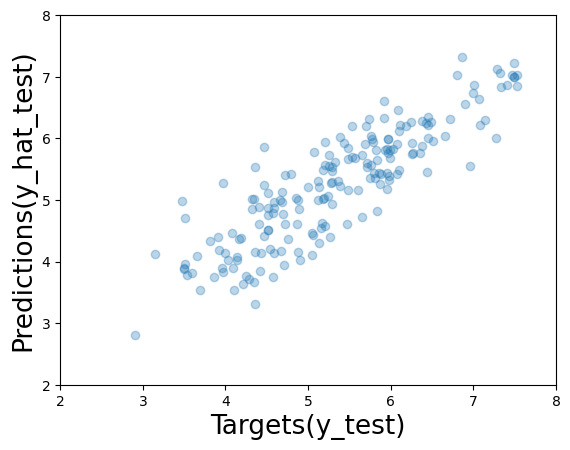

In [40]:
plt.scatter(y_test,y_hat_test, alpha=0.3)
plt.xlabel('Targets(y_test)',size=19)
plt.ylabel('Predictions(y_hat_test)',size=19)
plt.xlim(2,8)
plt.ylim(2,8)
plt.show()

In [41]:
reg.score(x_test,y_test)

0.7540769587422185

The $R^2$ is 75.4% which is close to the $R^2$ of the train data set. So there is no overfitting

## L2 Regularisation

Ridge Regression is more closely related to the Principal Component Analysis(PCA). It can be shown that PCA and ridge regression are very closely related. One can even think of ridge regression as a continuous version of PCA


In [42]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=10, max_iter= 50,tol=0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=10, max_iter=50, tol=0.1)

In [43]:
ridge_reg.score(x_test,y_test)

0.7547007296338335

In [44]:
ridge_reg.score(x_train,y_train)

0.7577968856757352

# CLASSIFICATION

In [45]:
df["Happiness Score Category"] = pd.cut(x=df["Happiness Score"],bins=[0,5,np.inf], labels=["Unhappy","Happy"])
df

,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Happiness Score Category
0,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,Happy
1,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,Happy
2,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,Happy
3,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,Happy
4,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,Happy
5,7.406,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,Happy
6,7.378,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,Happy
7,7.364,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,Happy
8,7.286,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,Happy
9,7.284,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,Happy


In [46]:
df["Happiness Score Category"]= df["Happiness Score Category"].map({'Happy':1,'Unhappy':0})
df

,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Happiness Score Category
0,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,1
1,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,1
2,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,1
3,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,1
4,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,1
5,7.406,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,1
6,7.378,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,1
7,7.364,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,1
8,7.286,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,1
9,7.284,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,1


In [47]:
df = df.drop('Happiness Score', axis=1)
df

,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Happiness Score Category
0,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,1
1,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,1
2,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,1
3,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,1
4,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,1
5,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,1
6,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,1
7,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,1
8,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,1
9,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,1


## SPLITTING DATA into x,y

In [48]:
x = df.drop('Happiness Score Category',axis = 1).values
y = df['Happiness Score Category']
y = y.astype(int)
print(x.shape)
print(y.shape)

(931, 6)
(931,)


## Hold-Out Validation

In [49]:
#First Set
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=42)

#Second set for hypertuning
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size = 0.10, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)


print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(837, 6)
(187, 6)
(94, 6)
(837,)
(187,)
(94,)


## Logistic Classifier

## Running Logistic Regression

In [50]:
log_reg = LogisticRegression(random_state=42, solver='lbfgs')
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

### Evaluation of the model

In [51]:
print("THE TRAINING ACCURACY :", log_reg.score(X_train, y_train))

THE TRAINING ACCURACY : 0.8721624850657109


In [52]:
print("THE TEST ACCURACY :", log_reg.score(X_test, y_test))

THE TEST ACCURACY : 0.8716577540106952


In [53]:
print("CLASSIFICATION REPORT")
y_predicted = log_reg.predict(X_train)
print(classification_report(y_train,y_predicted))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       313
           1       0.87      0.93      0.90       524

    accuracy                           0.87       837
   macro avg       0.87      0.85      0.86       837
weighted avg       0.87      0.87      0.87       837



### Confusion Matrix

In [54]:
def plot_confusion_matrix(cm,classes=None, title='CONFUSION MATRIX'):
    if classes is not None:
        sns.heatmap(cm,xticklabels=classes,yticklabels=classes, vmin=0.,vmax=1.,annot=True, annot_kws={'size':40})
    else:
         sns.heatmap(cm,vmin=0.,vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [55]:
cm = confusion_matrix(y_train,y_predicted)
cm

array([[242,  71],
       [ 36, 488]])

In [56]:
cm_normalised = cm/cm.sum(axis=1).reshape(-1,1)
cm_normalised

array([[0.77316294, 0.22683706],
       [0.06870229, 0.93129771]])

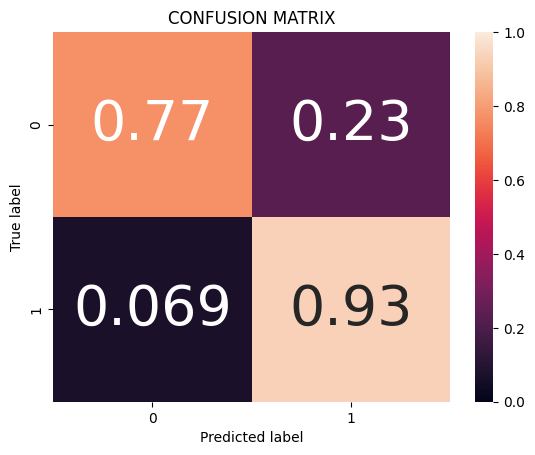

In [57]:
plot_confusion_matrix(cm_normalised, classes =log_reg.classes_, title='CONFUSION MATRIX')

In [58]:
False_Positives = cm.sum(axis=0)- np.diag(cm)
False_Negatives = cm.sum(axis=1)-np.diag(cm)

True_Positives = np.diag(cm)
True_Negatives = cm.sum() - (False_Positives + False_Negatives + True_Positives)

In [59]:
logistic_TPR = True_Positives/(True_Positives + False_Negatives)
print("TRUE POSITIVE RATE: ", logistic_TPR )

TRUE POSITIVE RATE:  [0.77316294 0.93129771]


In [60]:
logistic_PPV  = True_Positives/(True_Positives +False_Positives)
print("THE PRECISION :", logistic_PPV)

THE PRECISION : [0.8705036  0.87298748]


In [61]:
logistic_FPR = False_Positives/(False_Positives+True_Negatives)
print("FALSE POSITIVE RATE: ", logistic_FPR )

FALSE POSITIVE RATE:  [0.06870229 0.22683706]


In [62]:
logistic_FNR = False_Negatives/(False_Negatives+True_Positives)
print("FALSE NEGATIVE RATE: ", logistic_FNR )

FALSE NEGATIVE RATE:  [0.22683706 0.06870229]


## SVM Classifier

### Running the SVM Regression

In [63]:
model_SVC = SVC(kernel='rbf', random_state=42)
model_SVC.fit(X_train, y_train)

SVC(random_state=42)

### Evaluation of the Model

In [64]:
print("THE TRAINING ACCURACY :",model_SVC.score(X_train,y_train))

THE TRAINING ACCURACY : 0.8853046594982079


In [65]:
print("THE TEST ACCURACY :",model_SVC.score(X_test,y_test))

THE TEST ACCURACY : 0.893048128342246


In [66]:
print("CLASSIFICATION REPORT")
y_pred_SVC = model_SVC.predict(X_train)
print(classification_report(y_train,y_pred_SVC))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       313
           1       0.90      0.92      0.91       524

    accuracy                           0.89       837
   macro avg       0.88      0.87      0.88       837
weighted avg       0.88      0.89      0.88       837



In [67]:
svc_CM = confusion_matrix(y_train,y_pred_SVC)
svc_CM

array([[259,  54],
       [ 42, 482]])

In [68]:
svc_CM_normalised = svc_CM/svc_CM.sum(axis=1).reshape(-1,1)
svc_CM_normalised

array([[0.82747604, 0.17252396],
       [0.08015267, 0.91984733]])

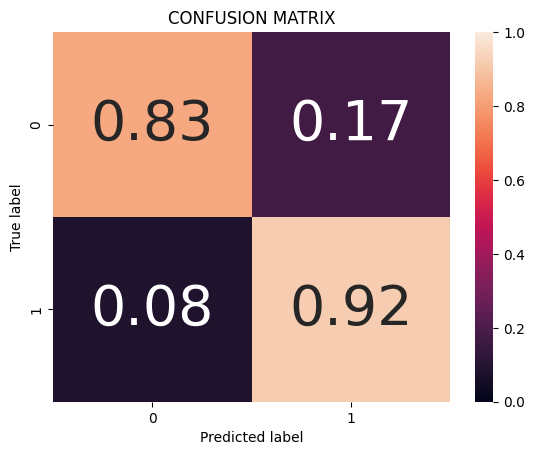

In [69]:
plot_confusion_matrix(svc_CM_normalised, classes =model_SVC.classes_, title='CONFUSION MATRIX')

In [70]:
Fp = svc_CM.sum(axis=0)- np.diag(svc_CM)
Fn = svc_CM.sum(axis=1)-np.diag(svc_CM)

Tp = np.diag(svc_CM)
Tn = svc_CM.sum() - (Fp + Fn + Tp)

In [71]:
svc_TPR = Tp/(Tp + Fn)
print("TRUE POSITIVE RATE: ", svc_TPR )

TRUE POSITIVE RATE:  [0.82747604 0.91984733]


In [72]:
svc_PPV  = Tp/(Tp +Fp)
print("THE PRECISION :", svc_PPV)

THE PRECISION : [0.86046512 0.89925373]


In [73]:
svc_FPR = Fp/(Fp+Tp)
print("FALSE POSITIVE RATE: ", svc_FPR )

FALSE POSITIVE RATE:  [0.13953488 0.10074627]


In [74]:
svc_FNR = Fn/(Fn+Tp)
print("FALSE NEGATIVE RATE: ", svc_FNR )

FALSE NEGATIVE RATE:  [0.17252396 0.08015267]


## KNN Classifier

### Running the KNN Regression

In [75]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

### Evaluation of the Model

In [76]:
print("THE TRAINING ACCURACY :",classifier.score(X_train,y_train))

THE TRAINING ACCURACY : 0.921146953405018


In [77]:
print("THE TEST ACCURACY :",classifier.score(X_test,y_test))

THE TEST ACCURACY : 0.9037433155080213


In [78]:
print("CLASSIFICATION REPORT")
y_predict = classifier.predict(X_train)
print(classification_report(y_train,y_predict))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       313
           1       0.93      0.94      0.94       524

    accuracy                           0.92       837
   macro avg       0.92      0.91      0.92       837
weighted avg       0.92      0.92      0.92       837



In [79]:
CM = confusion_matrix(y_train,y_predict)
CM

array([[277,  36],
       [ 30, 494]])

In [80]:
CM_normalised = CM/CM.sum(axis=1).reshape(-1,1)
CM_normalised

array([[0.88498403, 0.11501597],
       [0.05725191, 0.94274809]])

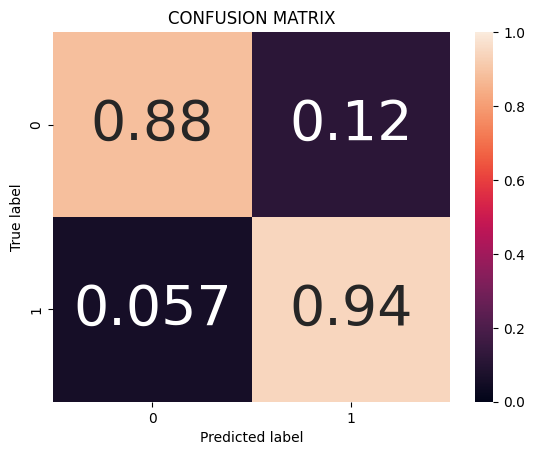

In [81]:
plot_confusion_matrix(CM_normalised, classes =classifier.classes_, title='CONFUSION MATRIX')

In [82]:
FP = CM.sum(axis=0)- np.diag(CM)
FN = CM.sum(axis=1)-np.diag(CM)

TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)

In [83]:
knn_TPR = TP/(TP + FN)
print("TRUE POSITIVE RATE: ", knn_TPR )

TRUE POSITIVE RATE:  [0.88498403 0.94274809]


In [84]:
knn_PPV  = TP/(TP +FP)
print("THE PRECISION :", knn_PPV)

THE PRECISION : [0.90228013 0.93207547]


In [85]:
knn_FPR = FP/(FP+TN)
print("FALSE POSITIVE RATE: ", knn_FPR )

FALSE POSITIVE RATE:  [0.05725191 0.11501597]


In [86]:
knn_FNR = FN/(FN+TP)
print("FALSE NEGATIVE RATE: ", knn_FNR )

FALSE NEGATIVE RATE:  [0.11501597 0.05725191]


## Random Forest

In [87]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
print("THE TRAINING ACCURACY :",RF.score(X_train,y_train))

THE TRAINING ACCURACY : 1.0


In [89]:
print("THE TEST ACCURACY :",RF.score(X_test,y_test))

THE TEST ACCURACY : 0.9251336898395722


In [90]:
print("CLASSIFICATION REPORT")
y_pred = RF.predict(X_train)
print(classification_report(y_train,y_pred))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       524

    accuracy                           1.00       837
   macro avg       1.00      1.00      1.00       837
weighted avg       1.00      1.00      1.00       837



In [91]:
cM = confusion_matrix(y_train,y_pred)
cM

array([[313,   0],
       [  0, 524]])

In [92]:
cM_normalised = cM/cM.sum(axis=1).reshape(-1,1)
cM_normalised

array([[1., 0.],
       [0., 1.]])

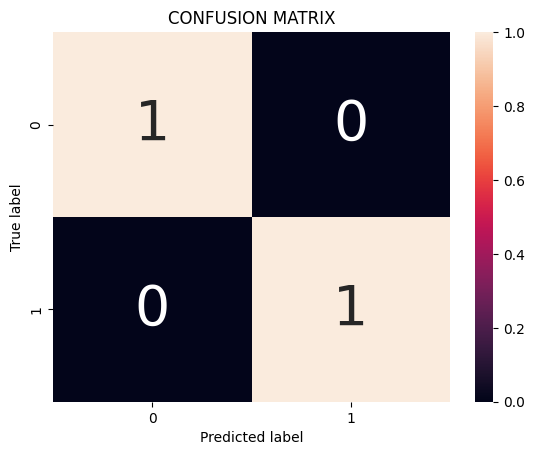

In [93]:
plot_confusion_matrix(cM_normalised, classes =RF.classes_, title='CONFUSION MATRIX')

In [94]:
fp = cM.sum(axis=0)- np.diag(cM)
fn = cM.sum(axis=1)-np.diag(cM)

tp = np.diag(cM)
tn = cM.sum() - (fp + fn + tp)

In [95]:
RF_TPR = tp/(tp + fn)
print("TRUE POSITIVE RATE: ", RF_TPR )

TRUE POSITIVE RATE:  [1. 1.]


In [96]:
RF_PPV  = tp/(tp +fp)
print("THE PRECISION :", RF_PPV)

THE PRECISION : [1. 1.]


In [97]:
RF_FPR = fp/(fp+tn)
print("FALSE POSITIVE RATE: ", RF_FPR )

FALSE POSITIVE RATE:  [0. 0.]


In [98]:
RF_FNR = fn/(fn+tp)
print("FALSE NEGATIVE RATE: ", RF_FNR )

FALSE NEGATIVE RATE:  [0. 0.]


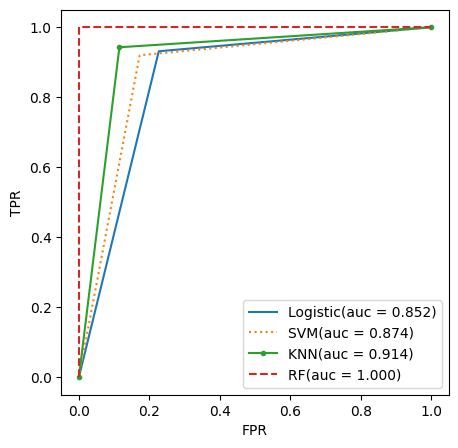

In [99]:
logistic_FPR , logistic_TPR , threshold = roc_curve(y_train,y_predicted)
logistic_AUC = auc(logistic_FPR,logistic_TPR)

svc_FPR , svc_TPR , threshold = roc_curve(y_train,y_pred_SVC)
svc_AUC = auc(svc_FPR,svc_TPR)

knn_FPR , knn_TPR , threshold = roc_curve(y_train,y_predict)
knn_AUC = auc(knn_FPR,knn_TPR)

RF_FPR , RF_TPR , threshold = roc_curve(y_train,y_pred)
RF_AUC = auc(RF_FPR,RF_TPR)

plt.figure(figsize=(5,5), dpi =100)
plt.plot(logistic_FPR,logistic_TPR, linestyle="-", label ='Logistic(auc = %0.3f)'%logistic_AUC)
plt.plot(svc_FPR,svc_TPR, linestyle=":", label ='SVM(auc = %0.3f)'%svc_AUC)
plt.plot(knn_FPR,knn_TPR, marker=".", label ='KNN(auc = %0.3f)'%knn_AUC)
plt.plot(RF_FPR,RF_TPR, linestyle="--", label ='RF(auc = %0.3f)'%RF_AUC)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()